In [1]:
# World Map Chart

In [1]:
library(ggplot2)
library(dplyr)
library(rnaturalearth)
library(readr)

Warning message:
"package 'ggplot2' was built under R version 4.3.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'rnaturalearth' was built under R version 4.3.3"


In [2]:
# Load your datasets
metadata <- read_csv("unicef_metadata2.csv", show_col_types = FALSE)

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"


In [3]:
metadata

country alpha_2_code alpha_3_code numeric_code year      Population 
1     AFG     4            1960          8622466     0          548888849 
2     AFG     4            1961          8790140     0          560000022 
3     AFG     4            1962          8969047     0          557777807 
4     AFG     4            1963          9157465     0          766666707 
5     AFG     4            1964          9355514     0          815555562 
6     AFG     4            1965          9565147     0         1026666678 
7     AFG     4            1966          9783147     0         1428888871 
8     AFG     4            1967         10010030     0         1708888882 
9     AFG     4            1968         10247780     0         1402222182 
10    AFG     4            1969         10494489     0         1437777738 
11    AFG     4            1970         10752971     0         1784444427 
12    AFG     4            1971         11015857     0         1868886653 
13    AFG     4            1972         11286753     0         1631108938 
14    AFG     4            1973         11575305     0         1771108944 
15    AFG     4            1974         11869879     0         2202222229 
16    AFG     4            1975         12157386     0         2417777778 
17    AFG     4            1976         12425267     0         2611111162 
18    AFG     4            1977         12687301     0         3017777698 
19    AFG     4            1978         12938862     0         3371111038 
20    AFG     4            1979         12986369     0         3775743789 
21    AFG     4            1980         12486631     0         3716553247 
22    AFG     4            1981         11155195     0         3551514996 
23    AFG     4            1982         10088289     0                  0 
24    AFG     4            1983          9951449     0                  0 
25    AFG     4            1984         10243686     0                  0 
26    AFG     4            1985         10512221     0                  0 
27    AFG     4            1986         10448442     0                  0 
28    AFG     4            1987         10322758     0                  0 
29    AFG     4            1988         10383460     0                  0 
30    AFG     4            1989         10673168     0                  0 
⋮     ⋮       ⋮            ⋮            ⋮            ⋮         ⋮          
13264 ZWE     716          1993         10794918     1498.6499  4966395800
13265 ZWE     716          1994         10858594     1627.4533  4984079900
13266 ZWE     716          1995         10994041     1609.9431  5011439600
13267 ZWE     716          1996         11178171     1747.4774  6498403900
13268 ZWE     716          1997         11362401     1765.2271  5920885800
13269 ZWE     716          1998         11548364     1786.9121  3922106400
13270 ZWE     716          1999         11716454     1746.8721  4569525100
13271 ZWE     716          2000         11834676     1676.5155  4364369600
13272 ZWE     716          2001         11910978     1689.7564  4651412000
13273 ZWE     716          2002         11984644     1530.0064  4604369600
13274 ZWE     716          2003         12075828     1260.3911  4311320200
13275 ZWE     716          2004         12160881     1178.8902  3979205900
13276 ZWE     716          2005         12224753     1105.7551  3986470800
13277 ZWE     716          2006         12330490     1058.3256  3428821300
13278 ZWE     716          2007         12450568     1009.8275  2956545000
13279 ZWE     716          2008         12550347      824.7917  1559870100
13280 ZWE     716          2009         12679810      914.4946  8811048700
13281 ZWE     716          2010         12839771     1096.8355 11074562500
13282 ZWE     716          2011         13025785     1239.2418 12515356900
13283 ZWE     716          2012         13265331     1408.4572 15245882400
13284 ZWE     716          2013         13555422     1422.3767 17220872400
13285 ZWE     716          2014

In [4]:
metadata <- metadata %>%
  filter(year == 2019) %>%
  mutate(alpha_3_code = toupper(alpha_3_code))

In [5]:
world <- ne_countries(scale = "medium", returnclass = "sf")

In [6]:
world_data <- left_join(world, metadata, by = c("iso_a3" = "alpha_3_code"))

In [8]:
world_data

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



featurecla      scalerank labelrank sovereignt                     sov_a3
1   Admin-0 country 1         3         Zimbabwe                       ZWE   
2   Admin-0 country 1         3         Zambia                         ZMB   
3   Admin-0 country 1         3         Yemen                          YEM   
4   Admin-0 country 3         2         Vietnam                        VNM   
5   Admin-0 country 5         3         Venezuela                      VEN   
6   Admin-0 country 6         6         Vatican                        VAT   
7   Admin-0 country 1         4         Vanuatu                        VUT   
8   Admin-0 country 1         3         Uzbekistan                     UZB   
9   Admin-0 country 1         4         Uruguay                        URY   
10  Admin-0 country 3         6         Federated States of Micronesia FSM   
11  Admin-0 country 5         6         Marshall Islands               MHL   
12  Admin-0 country 3         6         United States of America       US1   
13  Admin-0 country 3         6         United States of America       US1   
14  Admin-0 country 3         6         United States of America       US1   
15  Admin-0 country 3         4         United States of America       US1   
16  Admin-0 country 1         5         United States of America       US1   
17  Admin-0 country 5         2         United States of America       US1   
18  Admin-0 country 3         4         United Kingdom                 GB1   
19  Admin-0 country 3         5         United Kingdom                 GB1   
20  Admin-0 country 3         6         United Kingdom                 GB1   
21  Admin-0 country 3         4         United Kingdom                 GB1   
22  Admin-0 country 1         6         United Kingdom                 GB1   
23  Admin-0 country 1         5         United Kingdom                 GB1   
24  Admin-0 country 1         5         United Kingdom                 GB1   
25  Admin-0 country 3         6         United Kingdom                 GB1   
26  Admin-0 country 3         6         United Kingdom                 GB1   
27  Admin-0 country 3         6         United Kingdom                 GB1   
28  Admin-0 country 3         6         United Kingdom                 GB1   
29  Admin-0 country 4         6         United Kingdom                 GB1   
30  Admin-0 country 4         6         United Kingdom                 GB1   
⋮   ⋮               ⋮         ⋮         ⋮                              ⋮     
213 Admin-0 country 1         5         Bosnia and Herzegovina         BIH   
214 Admin-0 country 1         3         Bolivia                        BOL   
215 Admin-0 country 1         5         Bhutan                         BTN   
216 Admin-0 country 1         5         Benin                          BEN   
217 Admin-0 country 1         6         Belize                         BLZ   
218 Admin-0 country 1         2         Belgium                        BEL   
219 Admin-0 country 1         4         Belarus                        BLR   
220 Admin-0 country 1         5         Barbados                       BRB   
221 Admin-0 country 1         3         Bangladesh                     BGD   
222 Admin-0 country 1         4         Bahrain                        BHR   
223 Admin-0 country 1         4         The Bahamas                    BHS   
224 Admin-0 country 1         5         Azerbaijan                     AZE   
225 Admin-0 country 1         4         Austria                        AUT   
226 Admin-0 country 1         2         Australia                      AU1   
227 Admin-0 country 5         5         Australia                      AU1   
228 Admin-0 country 5         5         Australia                      AU1   
229 Admin-0 country 5         5         Australia                      AU1   
230 Admin-0 country 5         5         Australia                      AU1   
231 Admin-0 country 1         6         Armenia                        ARM   
232 Admin-0 country 1     

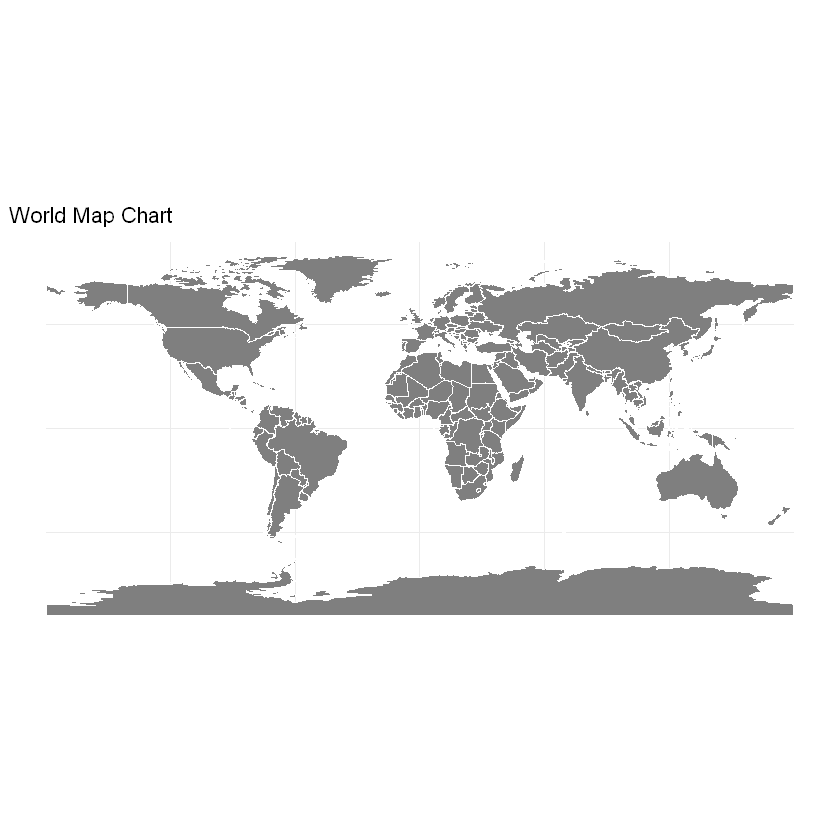

In [43]:
ggplot(data = world_data) +
  geom_sf(aes(fill = GDP_per_capita), color = "white") + 
  scale_fill_viridis_c() + # This is just one option for color scale
  labs(title = "World Map Chart", fill = "Indicator Name") +
  theme_minimal()

As we gaze upon the varying shades of our World Map, each hue narrates a tale of economic diversity. Our map, painted with the spectrum of viridis, reveals the stark contrasts in GDP per capita – a metric telling of each nation's economic pulse. The darker tones whisper of wealth, marking regions where prosperity is a familiar denizen. In contrast, the lighter areas speak of economies still in the embrace of growth's potential. This map is more than a mere depiction of data; it's a global mosaic, each piece holding stories of struggle, triumph, and the unyielding march of progress.

ggplot(data = world_data) +
  geom_sf(aes(fill = GDP_per_capita), color = "white") + 
  scale_fill_viridis_c() + # This is just one option for color scale
  labs(title = "World Map Chart", fill = "Indicator Name") +
  theme_minimal()

In [10]:
# bar chart

In [19]:
data <- read_csv("unicef_metadata2.csv")

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 13293 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): country
dbl (8): alpha_2_code, alpha_3_code, numeric_code, year, Population, total, ...
lgl (4): Inflation, consumer prices (annual %)", Life expectancy at birth, t...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
str(data)

spc_tbl_ [13,293 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country                                : chr [1:13293] "AFG" "AFG" "AFG" "AFG" ...
 $ alpha_2_code                           : num [1:13293] 4 4 4 4 4 4 4 4 4 4 ...
 $ alpha_3_code                           : num [1:13293] 1960 1961 1962 1963 1964 ...
 $ numeric_code                           : num [1:13293] 8622466 8790140 8969047 9157465 9355514 ...
 $ year                                   : num [1:13293] 0 0 0 0 0 0 0 0 0 0 ...
 $ Population                             : num [1:13293] 5.49e+08 5.60e+08 5.58e+08 7.67e+08 8.16e+08 ...
 $ total                                  : num [1:13293] 0 0 0 0 0 0 0 0 0 0 ...
 $ GDP_per_capita                         : num [1:13293] 32.5 33.1 33.5 34 34.5 ...
 $ GNI                                    : num [1:13293] 0 0 0 0 0 0 0 0 0 0 ...
 $ Inflation                              : logi [1:13293] NA NA NA NA NA NA ...
 $ consumer prices (annual %)"            : logi [1:13293] NA

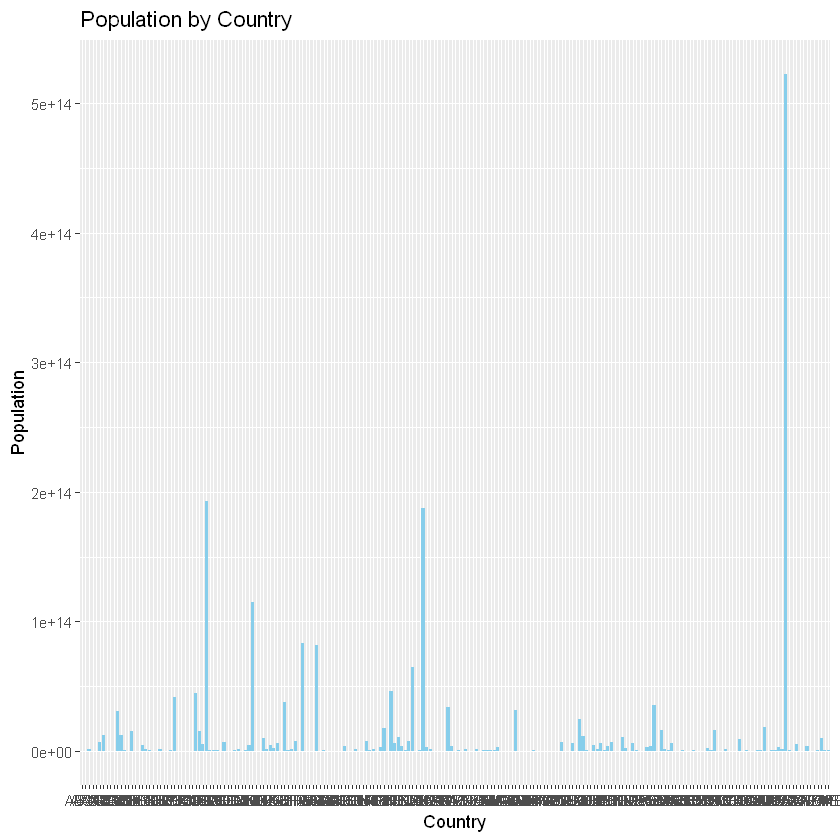

In [21]:
ggplot(data, aes(x = country, y = Population)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Population by Country", x = "Country", y = "Population")

Each bar in our sky-blue chart stands as a testament to the multitude of lives that knit the fabric of each nation. From the bustling streets of populous cities to the quietude of smaller towns, the chart reveals the scale of humanity's footprint across our world. While some countries burst at the seams with burgeoning populations, others maintain a more modest count. This simple yet powerful visualization brings to the forefront the sheer diversity of human existence, highlighting not only the numbers but the stories behind them—stories of communities, resources, and the delicate balance of sustenance that each country strives to maintain.

In [22]:
# scatterplot with linear regression line

In [23]:
data <- read_csv("unicef_indicator_1.csv")

Rows: 178 Columns: 10
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): country, alpha_2_code, alpha_3_code, indicator, sex, unit_of_measur...
dbl (3): numeric_code, time_period, obs_value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
str(data)

spc_tbl_ [178 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country        : chr [1:178] "Albania" "Algeria" "Angola" "Antigua and Barbuda" ...
 $ alpha_2_code   : chr [1:178] "AL" "DZ" "AO" "AG" ...
 $ alpha_3_code   : chr [1:178] "ALB" "DZA" "AGO" "ATG" ...
 $ numeric_code   : num [1:178] 8 12 24 28 32 51 533 36 40 31 ...
 $ indicator      : chr [1:178] "government expenditure (% GDP)" "government expenditure (% GDP)" "government expenditure (% GDP)" "government expenditure (% GDP)" ...
 $ time_period    : num [1:178] 2019 2019 2019 2018 2019 ...
 $ obs_value      : num [1:178] 11.5 16.9 10.3 16.4 15.8 ...
 $ sex            : chr [1:178] "Total" "Total" "Total" "Total" ...
 $ unit_of_measure: chr [1:178] "%" "%" "%" "%" ...
 $ current_age    : chr [1:178] "Total" "Total" "Total" "Total" ...
 - attr(*, "spec")=
  .. cols(
  ..   country = col_character(),
  ..   alpha_2_code = col_character(),
  ..   alpha_3_code = col_character(),
  ..   numeric_code = col_double(),
  ..   indicat

In [25]:
head(data)

country             alpha_2_code alpha_3_code numeric_code
1 Albania             AL           ALB           8          
2 Algeria             DZ           DZA          12          
3 Angola              AO           AGO          24          
4 Antigua and Barbuda AG           ATG          28          
5 Argentina           AR           ARG          32          
6 Armenia             AM           ARM          51          
  indicator                      time_period obs_value sex   unit_of_measure
1 government expenditure (% GDP) 2019        11.52394  Total %              
2 government expenditure (% GDP) 2019        16.94610  Total %              
3 government expenditure (% GDP) 2019        10.32928  Total %              
4 government expenditure (% GDP) 2018        16.39424  Total %              
5 government expenditure (% GDP) 2019        15.77101  Total %              
6 government expenditure (% GDP) 2019        12.47209  Total %              
  current_age
1 Total      
2 Total      
3 Total      
4 Total      
5 Total      
6 Total

`geom_smooth()` using formula = 'y ~ x'


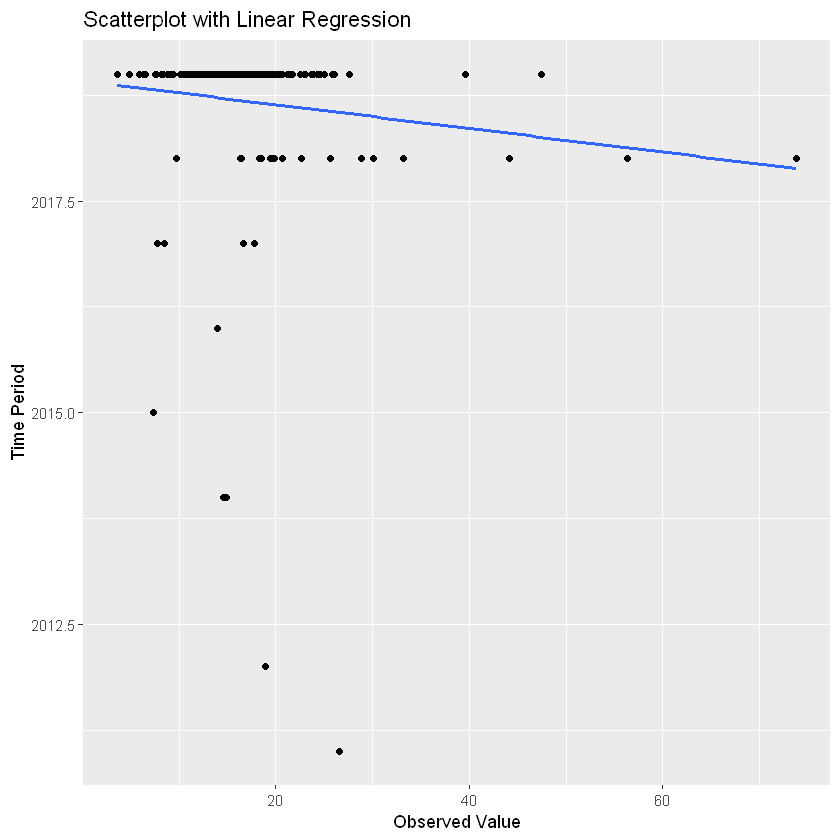

In [26]:
ggplot(data, aes(x = obs_value, y = time_period)) +
  geom_point() +  # Add points for scatterplot
  geom_smooth(method = "lm", se = FALSE) +  # Add linear regression line
  labs(title = "Scatterplot with Linear Regression", x = "Observed Value", y = "Time Period")

With each point plotted on this chart, we capture a moment in time, anchoring it to a tangible value observed in our world. As our eyes traverse from dot to dot, we witness the dance of data points around the steadfast line of regression—a line that cuts through the noise to reveal the underlying trend. This scatterplot with its linear guide tells a story of change, of progression or regression over periods, inviting us to ponder the factors driving these shifts. It's a visual chronicle of cause and consequence, a plotted history that prompts inquiry into the past and speculation about the future.



In [27]:
# timeseries chart

In [38]:
data <- read_csv("unicef_metadata2.csv")

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 13293 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): country
dbl (8): alpha_2_code, alpha_3_code, numeric_code, year, Population, total, ...
lgl (4): Inflation, consumer prices (annual %)", Life expectancy at birth, t...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [39]:
str(data)

spc_tbl_ [13,293 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country                                : chr [1:13293] "AFG" "AFG" "AFG" "AFG" ...
 $ alpha_2_code                           : num [1:13293] 4 4 4 4 4 4 4 4 4 4 ...
 $ alpha_3_code                           : num [1:13293] 1960 1961 1962 1963 1964 ...
 $ numeric_code                           : num [1:13293] 8622466 8790140 8969047 9157465 9355514 ...
 $ year                                   : num [1:13293] 0 0 0 0 0 0 0 0 0 0 ...
 $ Population                             : num [1:13293] 5.49e+08 5.60e+08 5.58e+08 7.67e+08 8.16e+08 ...
 $ total                                  : num [1:13293] 0 0 0 0 0 0 0 0 0 0 ...
 $ GDP_per_capita                         : num [1:13293] 32.5 33.1 33.5 34 34.5 ...
 $ GNI                                    : num [1:13293] 0 0 0 0 0 0 0 0 0 0 ...
 $ Inflation                              : logi [1:13293] NA NA NA NA NA NA ...
 $ consumer prices (annual %)"            : logi [1:13293] NA

In [40]:
data$year <- as.Date(as.character(data$alpha_3_code), format = "%Y")

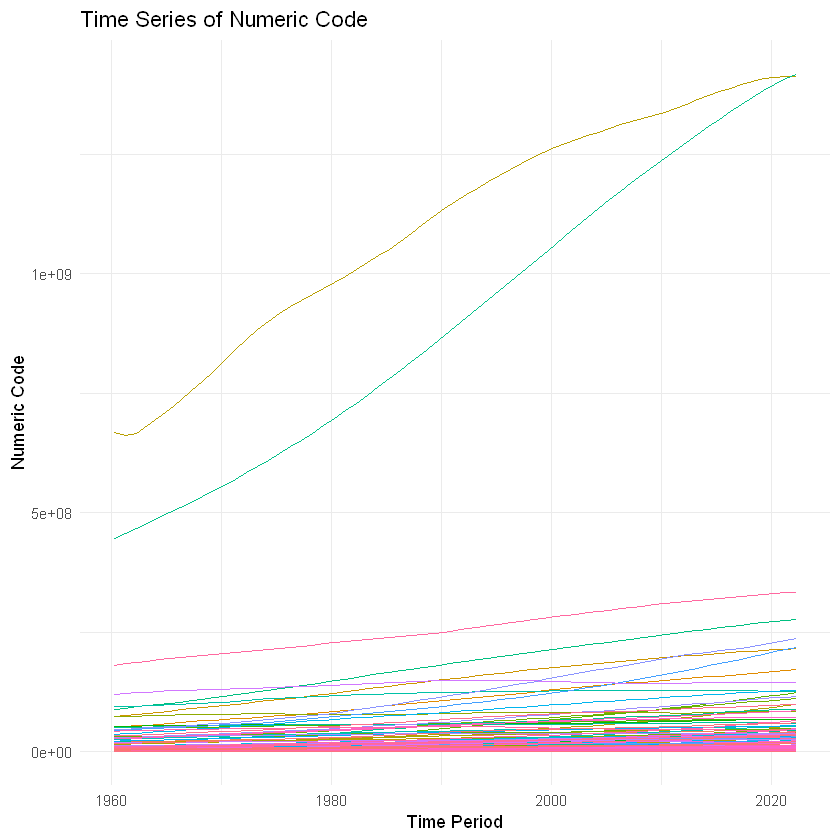

In [42]:
ggplot(data, aes(x = year, y = numeric_code, group = country, color = country)) +
  geom_line() +
  labs(title = "Time Series of Numeric Code", x = "Time Period", y = "Numeric Code") +
  theme_minimal() +
  theme(legend.position = "none")

In this minimalistic time series, lines trace the journey of an enigmatic 'Numeric Code' across the canvas of years. Each line, a different hue, reveals the unique path of a country through time—some weave steadily upwards, others fluctuate or dive, echoing the dynamism of the unseen forces at play. With the legend set aside, our focus is undivided, contemplating the unspoken stories behind these numeric trajectories. This graph isn't just about the data; it’s a visual symphony of time, played out in the key of numbers, each note resonating with the complexities of national narratives.